In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#loading dataset
data=pd.read_csv(r"C:\Users\bobby patel\Desktop\car_price\cars_price.csv",index_col="Unnamed: 0")

In [3]:
#top 5 data points
data.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [4]:
#data information 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 40000 non-null  object 
 1   model                40000 non-null  object 
 2   priceUSD             40000 non-null  int64  
 3   year                 40000 non-null  int64  
 4   condition            40000 non-null  object 
 5   mileage(kilometers)  40000 non-null  float64
 6   fuel_type            40000 non-null  object 
 7   volume(cm3)          39970 non-null  float64
 8   color                40000 non-null  object 
 9   transmission         40000 non-null  object 
 10  drive_unit           38655 non-null  object 
 11  segment              36245 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 4.0+ MB


In [5]:
# it describe stats of data
data.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,40000.000000,40000.000000,4.000000e+04,39970.000000
mean,7430.383775,2003.485625,2.434332e+05,2103.201676
std,8338.242134,8.114896,3.167033e+05,938.724653
min,95.000000,1938.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.280000e+05,1995.000000
75%,9850.000000,2010.000000,3.087610e+05,2300.000000
max,195000.000000,2019.000000,9.999999e+06,20000.000000


(array([8.3000e+01, 1.1030e+03, 1.1206e+04, 1.5367e+04, 3.9750e+03,
        3.1070e+03, 2.4560e+03, 1.0870e+03, 3.1200e+02, 2.4700e+02,
        4.6500e+02, 2.5000e+02, 1.3000e+02, 5.9000e+01, 5.6000e+01,
        3.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 6.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 9.0000e+00,
        0.0000e+00, 0.0000e+00, 9.0000e+00, 0.0000e+00, 2.1000e+01]),
 array([  500.,   890.,  1280.,  1670.,  2060.,  2450.,  2840.,  3230.,
         3620.,  4010.,  4400.,  4790.,  5180.,  5570.,  5960.,  6350.,
         6740.,  7130.,  7520.,  7910.,  8300.,  8690.,  9080.,  9470.,
         9860., 10250., 10640., 11030., 11420., 11810., 12200., 12590.,
        12980., 13370., 13760.

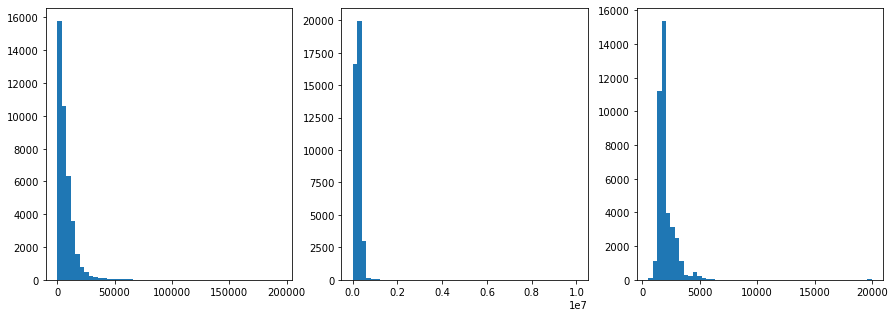

In [11]:
#plotting histograms for priceUsd,milage and volume
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(data["priceUSD"],bins=50)
plt.subplot(1,3,2)
plt.hist(data["mileage(kilometers)"],bins=50)
plt.subplot(1,3,3)
plt.hist(data["volume(cm3)"],bins=50)

- histogram shows data point are right skewed.
- we use log-transformation and Standard Scaler technique to make data point normally distributed but first we check null values and try to remove them.

In [12]:
#now,we check data for null values.
#and is found, we take steps to either drop them or impute them
#with some values.
data.isnull().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer
#imputing null values to volume column
#since,volume is float type data that's why strategy="mean" is used.
SI=SimpleImputer(strategy="mean")
data["volume(cm3)"]=SI.fit_transform(data[["volume(cm3)"]])
#since,segment and drive_unit were object type
#that is why strategy="most frquent" is used.
SI=SimpleImputer(strategy="most_frequent")
data["segment"]=SI.fit_transform(data[["segment"]])
SI=SimpleImputer(strategy="most_frequent")
data["drive_unit"]=SI.fit_transform(data[["drive_unit"]])

In [14]:
#again,check for null values
data.isnull().any()

make                   False
model                  False
priceUSD               False
year                   False
condition              False
mileage(kilometers)    False
fuel_type              False
volume(cm3)            False
color                  False
transmission           False
drive_unit             False
segment                False
dtype: bool

- now, there is no null value in our data.

In [15]:
data.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [16]:
#we remove year column and replace it with 
# difference of current year and year which will show how old car is.
data["current_year"]=2020
data["YEAR"]=data["current_year"]-data["year"]
data=data.drop(["year","current_year"],axis=1)

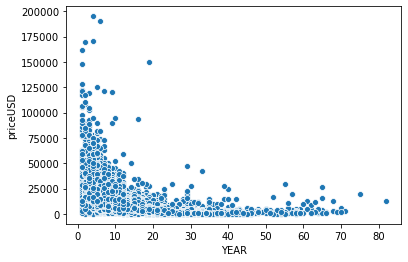

In [17]:
 #plotting priceUSD vs YEAR
 sns.scatterplot(data["YEAR"],data["priceUSD"])

- **YEAR VS priceUSD** plots shows as age of car increase its price decrease.

In [18]:
data.head()

,make,model,priceUSD,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,YEAR
0,honda,accord,565,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D,27
1,ford,fusion,5550,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M,12
2,nissan,teana,8300,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D,12
3,volkswagen,fox,3300,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A,15
4,nissan,primera,2450,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,18


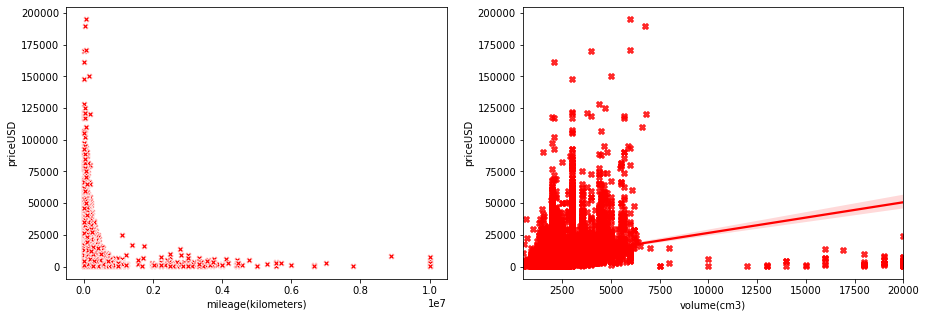

In [19]:
 #we see how volume and mileage are related to priceUSD
 plt.figure(figsize=(15,5))
 plt.subplot(1,2,1)
 sns.scatterplot(data["mileage(kilometers)"],data["priceUSD"],marker="X",color="red")
 plt.subplot(1,2,2)
 sns.regplot(data["volume(cm3)"],data["priceUSD"],marker="X",color="red")
 

- plot shows there are some outlier in dataset.
- car with less mileage has higher price.
- from plot we see volume and price are linearly co-related.


In [20]:
# here we group categorical data and sort then in descending order of priceUSD
#defining a function grouping_data
def grouping_data(feature):
  group=data.groupby(data[feature]).mean()
  group_sort=group.sort_values(by="priceUSD",ascending=False)
  sns.barplot(group_sort.priceUSD,group_sort.index)


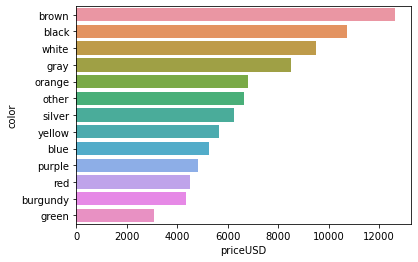

In [21]:
#grouing color wise
grouping_data("color")

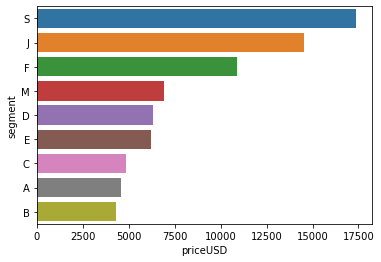

In [22]:
#grouping segment wise
grouping_data("segment")

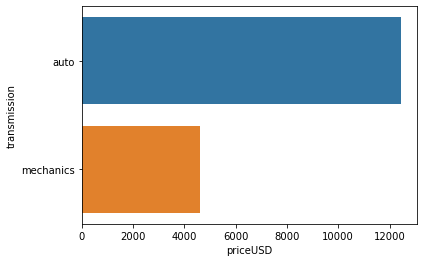

In [23]:
#grouping transmission wise
grouping_data("transmission")

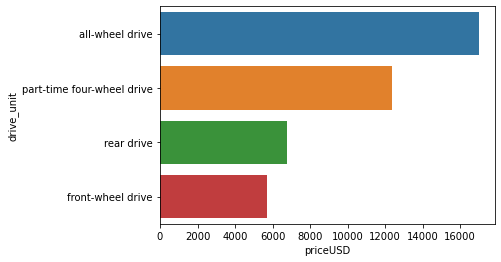

In [24]:
#grouping drive_unit
grouping_data("drive_unit")

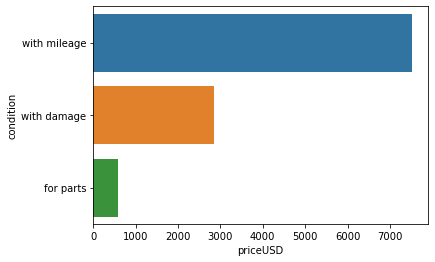

In [25]:
#grouping condition wise
grouping_data("condition")

## creating one-hot-encoding of categorical data


In [26]:
#before one-hot-encoding we drop some columns 
data=data.drop(["make","model"],axis=1)
data=pd.get_dummies(data,drop_first=True)

In [27]:
data.head()


,priceUSD,mileage(kilometers),volume(cm3),YEAR,condition_with damage,condition_with mileage,fuel_type_electrocar,fuel_type_petrol,color_blue,color_brown,...,drive_unit_part-time four-wheel drive,drive_unit_rear drive,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S
0,565,960015.0,2000.0,27,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5550,172000.0,1400.0,12,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8300,223000.0,2500.0,12,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3300,140000.0,1200.0,15,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2450,413000.0,2200.0,18,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   priceUSD                               40000 non-null  int64  
 1   mileage(kilometers)                    40000 non-null  float64
 2   volume(cm3)                            40000 non-null  float64
 3   YEAR                                   40000 non-null  int64  
 4   condition_with damage                  40000 non-null  uint8  
 5   condition_with mileage                 40000 non-null  uint8  
 6   fuel_type_electrocar                   40000 non-null  uint8  
 7   fuel_type_petrol                       40000 non-null  uint8  
 8   color_blue                             40000 non-null  uint8  
 9   color_brown                            40000 non-null  uint8  
 10  color_burgundy                         40000 non-null  uint8  
 11  co

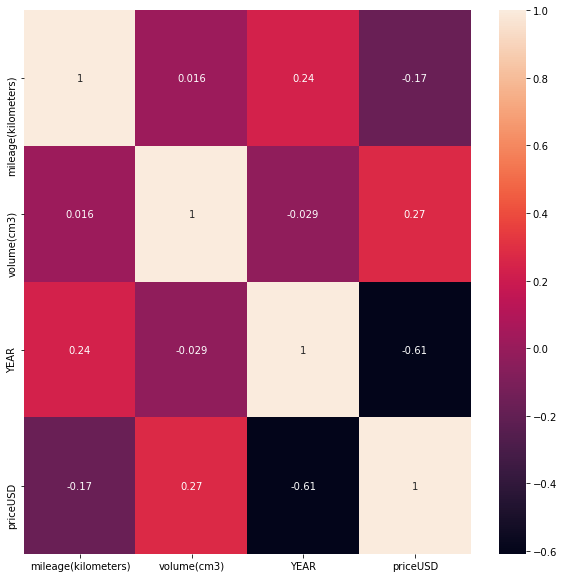

In [29]:
#we use heatmap to see co-relations between continous data points only..
cont_data=data.loc[:,["mileage(kilometers)","volume(cm3)","YEAR","priceUSD"]]
cm=cont_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

- plot shows YEAR and priceUSD are highly negatevely co-related which is alredy seen earlier.

In [30]:
#creating independent variable x and dependent varible y
x=data.drop("priceUSD",axis=1)
y=data.get("priceUSD")

In [31]:
#now we select best feature using f-test and p-value among them
from sklearn.feature_selection import f_regression
f_reg=f_regression(x,y)


In [32]:
f_reg

(array([1.21637360e+03, 3.20374912e+03, 2.35578589e+04, 1.04310494e+02,
        3.16319822e+02, 3.78157588e+02, 4.39384254e+02, 4.54203567e+02,
        3.81801542e+02, 2.06241884e+02, 7.63966181e+01, 8.35343462e+02,
        9.33918164e-01, 2.19378173e+01, 4.35799956e+01, 2.57450980e+02,
        1.74120354e+02, 2.60222250e+02, 9.72206770e+00, 1.01471571e+04,
        4.79334291e+03, 9.90306173e+02, 3.47465428e+01, 4.76245064e+02,
        8.89038336e+02, 3.25070029e+02, 1.00977365e+02, 1.16277374e+02,
        6.05536291e+03, 1.94521496e+01, 8.03531658e+02]),
 array([1.47915336e-262, 0.00000000e+000, 0.00000000e+000, 1.85361324e-024,
        1.71564750e-070, 7.65377633e-084, 4.90989732e-097, 3.17363376e-100,
        1.25312847e-084, 1.18575690e-046, 2.40886846e-018, 8.32987771e-182,
        3.33852701e-001, 2.82553326e-006, 4.12056540e-011, 9.34743322e-058,
        1.12797932e-039, 2.34690576e-058, 1.82197679e-003, 0.00000000e+000,
        0.00000000e+000, 9.67467714e-215, 3.78550390e-009,

- from f-test value and p-value we see that all the selected features are highly co-related
- every feature is highly co-related but we use another method to be more clarify about co-realations

In [33]:
#we use ExtraTreeRegressor to get the important feature 
from sklearn.tree import ExtraTreeRegressor
et_reg=ExtraTreeRegressor()
et_reg.fit(x,y)

ExtraTreeRegressor()

In [34]:
#getting list of important features
et_reg.feature_importances_

array([0.0382187 , 0.12684274, 0.39908392, 0.0025008 , 0.00110598,
       0.01531498, 0.02525272, 0.00625628, 0.00240994, 0.00166223,
       0.00551227, 0.00212237, 0.0006454 , 0.01117997, 0.01031014,
       0.00321267, 0.00357263, 0.0051709 , 0.00486337, 0.2024464 ,
       0.05196839, 0.00832306, 0.02752157, 0.0042171 , 0.00357321,
       0.00576873, 0.00430887, 0.00179538, 0.01441796, 0.00315143,
       0.0072699 ])

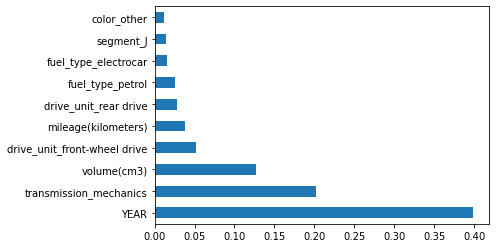

In [35]:
#now,we plot the top 10 most important feature
imp_feature=pd.Series(et_reg.feature_importances_,index=x.columns)
imp_feature.nlargest(10).plot(kind="barh")
plt.show()

In [36]:
#here we perform log-transformation to priceUSD and volume as these data contain outlier and is right skew
# after performing log-transformation now columns are distributed normally
data["volume(cm3)"]=np.log(data["volume(cm3)"])
data["priceUSD"]=np.log(data["priceUSD"])

(array([5.000e+00, 2.000e+00, 2.400e+01, 1.000e+01, 5.700e+01, 2.700e+01,
        1.000e+02, 1.540e+02, 1.510e+02, 2.360e+02, 4.600e+02, 1.960e+02,
        5.110e+02, 7.580e+02, 4.430e+02, 8.880e+02, 1.018e+03, 8.860e+02,
        1.469e+03, 1.466e+03, 1.086e+03, 1.506e+03, 1.480e+03, 1.826e+03,
        2.294e+03, 2.248e+03, 2.011e+03, 2.643e+03, 2.566e+03, 2.512e+03,
        2.328e+03, 2.292e+03, 1.887e+03, 1.362e+03, 9.670e+02, 7.080e+02,
        4.490e+02, 2.990e+02, 1.740e+02, 1.650e+02, 1.080e+02, 9.200e+01,
        5.100e+01, 2.600e+01, 2.700e+01, 9.000e+00, 1.400e+01, 2.000e+00,
        3.000e+00, 4.000e+00]),
 array([ 4.55387689,  4.70641445,  4.85895201,  5.01148957,  5.16402713,
         5.31656469,  5.46910225,  5.6216398 ,  5.77417736,  5.92671492,
         6.07925248,  6.23179004,  6.3843276 ,  6.53686516,  6.68940272,
         6.84194028,  6.99447783,  7.14701539,  7.29955295,  7.45209051,
         7.60462807,  7.75716563,  7.90970319,  8.06224075,  8.21477831,
         8.

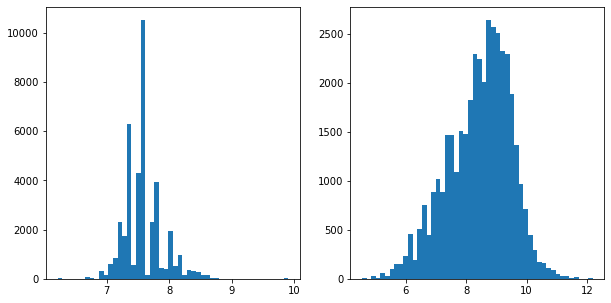

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(data["volume(cm3)"],bins=50)
plt.subplot(1,2,2)
plt.hist(data["priceUSD"],bins=50)

- we see that now priceUSD and volume are normally distributed.

In [39]:
# we now define dependent and independent variable to X and Y
X=data.loc[:,['YEAR', 'transmission_mechanics', 'volume(cm3)', 'mileage(kilometers)',
       'drive_unit_front-wheel drive', 'drive_unit_rear drive',
       'fuel_type_petrol', 'fuel_type_electrocar',
       'drive_unit_part-time four-wheel drive', 'color_other']]
Y=data.get("priceUSD")

In [40]:
#spliting data into test and train set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=42)


## scaling features

In [41]:
#using standard scaler to standardise values
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

## creating RandomForest model

In [42]:
#importing randomforestregressor and fit data to it.
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()
rf_reg.fit(x_train,y_train)




RandomForestRegressor()

In [43]:
#now we check how well train and test data are fitted
rf_reg.score(x_train,y_train)
                     
                     

0.9613319420627188

In [44]:
#now, we predict test data
rf_pred=rf_reg.predict(x_test)

In [45]:
#here,we check how well test and train set fitted to model.
rf_reg.score(x_test,y_test)

0.8194744038958283

- we see that the model is highly overfitted.
- we now perform hyperparameter tunning to get better results

## Hyperparameter Tunning

In [46]:
#import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [47]:
#defining parameters
max_depth=[2,4,5,7,8,10]
max_features=["auto","sqrt"]
max_depth=[int(x) for x in np.linspace(5,30,6)]
min_samples_leaf=[1,2,3,4,5]
n_estimators=[int(x) for x in np.linspace(100,1200,12)]
min_sample_split=[1,2,4,5,10]

In [48]:
#coverting parameters in form of dict
param={
    "max_depth":max_depth,
    "max_features":max_features,
    "max_depth":max_depth,
    "min_samples_leaf":min_samples_leaf,
    "n_estimators":n_estimators,
    
}

In [49]:
#Defining RandomizedsearchCV object to perform tunning
random_reg=RandomizedSearchCV(rf_reg,param_distributions=param,n_iter=10,scoring="neg_mean_squared_error",cv=5,verbose=1,random_state=42)

In [50]:
#fitting x_train and y_train to Randomizedsearchcv model
random_reg.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 23.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [51]:
#we now call best_params_ to get best parameters
random_reg.best_params_

{'n_estimators': 1000,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 20}

In [52]:
#here we use best_score_ to get the negative of mean squared error
random_reg.best_score_

-0.16223080195612874

In [53]:
#here,we csall best_estimator_ to get the best estimator model with parameters
# we use this model to get better rsults as describe previously
random_reg.best_estimator_

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=3,
                      n_estimators=1000)

In [54]:
#we now use best estimator 
rf_reg=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
#fitting best estimator
rf_reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=3,
                      n_estimators=1000)

In [55]:
#this shows the r^2 score 
#how good x_train and y_train is fitted to best estimator model
rf_reg.score(x_train,y_train)

0.8970066949350776

In [56]:
#best fitted score of x_test and y_test
rf_reg.score(x_test,y_test)

0.8505434154878326

- from above r^2 score values we can conclude that now overfitting is reduces

In [57]:
#prediction from best estimator model
y_pred=rf_reg.predict(x_test)

In [58]:
#now , se mean_squared_error of best estimator 
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred,y_test))

0.16139602150900903


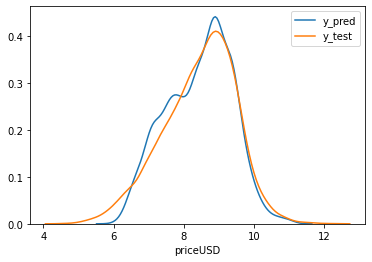

In [59]:
#here, we plot dist plot to get insight of how good is prediction
ax=sns.distplot(y_pred,hist=False,label="y_pred")
sns.distplot(y_test,hist=False,ax=ax,label="y_test")
plt.legend()

In [60]:
#here we import pickle and save our model
#import pickle
#file=open("car_price_prediction.pkl","wb")
#pickle.dump(rf_reg,file)